In [1]:
import tarfile
import matplotlib.pyplot as plt
from pathlib import Path
from dysh.util.download import from_url
from dysh.fits.gbtfitsload import GBTFITSLoad
from dysh.util.selection import Selection
from dysh.spectra.core import average
import numpy as np
import pandas as pd

In [8]:
path_to_raw_vegas = "/home/sdfits/AGBT24B_251_02/AGBT24B_251_02.raw.vegas/" 


In [9]:
# data loading
sdfits = GBTFITSLoad(path_to_raw_vegas, backend="VEGAS")

Flags were created from existing flag files. Use GBTFITSLoad.flags.show() to see them.


In [313]:
sdfits.flags.show()

 ID TAG OBJECT BANDWID DATE-OBS ... SUBOBSMODE FITSINDEX CHAN UTC # SELECTED
--- --- ------ ------- -------- ... ---------- --------- ---- --- ----------


In [324]:
sd_table = sdfits.summary()
#print(sdfits.summary().iloc[:, 0])
sd_table = pd.DataFrame(sd_table)
sd_table

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,97.59854,21.908178
1,7,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,99.79335,21.73278
2,8,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,99.39169,23.975813
3,9,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,100.781647,23.593848
4,10,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,101.231538,26.036336
5,11,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,102.421806,25.077636
6,12,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,103.146221,28.109582
7,13,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,104.875261,27.198765
8,14,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,105.11463,30.160391
9,15,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,106.438223,28.726869


In [57]:
unique_objects = sd_table["OBJECT"].unique()
print(unique_objects)
index = np.where(sd_table["OBJECT"] == unique_objects[0])
index

['BC25' 'BC13' 'BC22']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),)

In [64]:
sdfits.summary().iloc[:, 0][0:5]

# go through the object coloumn of the sd_table and make array of the scan numbers for every each object
# e.g. for the first object, BC25, the scans are 6, 8 , 10 , 12, 14, 16. 
for i in unique_objects:
    index = np.where(sd_table["OBJECT"] == i)
    for j in range(np.min(index) , np.max(index), 2):
        print(sd_table["SCAN"][j], end = "")
        print(i)

6BC25
8BC25
10BC25
12BC25
14BC25
16BC25
18BC13
20BC13
22BC13
24BC13
26BC13
28BC13
30BC22
32BC22
34BC22
36BC22
38BC22


In [177]:
class HI_reduction:
    # class for reducing the HI spectra of blue blobs.
    def __init__(self, session_no):
        path_to_raw_vegas = f"/home/sdfits/AGBT24B_251_{session_no}/AGBT24B_251_{session_no}.raw.vegas/" 
        sdfits = GBTFITSLoad(path_to_raw_vegas, backend="VEGAS")
        self.spectra = sdfits
        self.sd_table = pd.DataFrame(sdfits.summary())
        self.unique_objects = self.sd_table["OBJECT"].unique()
        print("BCs to choose form:", self.unique_objects)
        self.specs = sdfits.rawspectra(0,0)
        pairs = int(len(self.sd_table["OBJECT"])/2)
        self.specs = np.reshape(self.specs, (pairs, 488, -1)) 
        #self.index = np.where(sd_table["OBJECT"] == unique_objects[0])
        pass

    def scan_list(self, BC_name):
        self.index = np.where(self.sd_table["OBJECT"] == BC_name)
        lscan = []
        for j in range(np.min(self.index) , np.max(self.index), 2):
            lscan.append(int(self.sd_table["SCAN"][j]))
        return lscan, self.index[0]

    def avg_spectra(self, scan_list):
        ps_scanblock = self.spectra.getps(scan = scan_list, plnum=0)
        ps = ps_scanblock.timeaverage()
        return ps
    
    def cutoff(self,scan_list):
        fig = plt.subplots(figsize = (12, 11))
        #Inspect the data
        for i in range(0,34,2):#scan_list[1][::2]:
            spec_new = self.specs[i]
            stdevs = np.std(spec_new,axis=1)
            #Organize into scan and switching state.
            #There are 2 scans for the target and reference pointings, 2 calibration diode states, and 2 polarizations.
            stdevs = np.reshape(stdevs, (2,-1,4))
            nrows = stdevs.shape[1]
            #Inspect the data
            for scan in range(2):
                for sw_state in range(4):
                    plt.plot(stdevs[scan,:-1,sw_state],label=f'scan {(4*scan)+sw_state}')
            plt.xlabel('Integration #')
            plt.ylabel('sigma')
            #plt.legend()
        return plt.show()


In [178]:
Spectras = HI_reduction("03")

Flags were created from existing flag files. Use GBTFITSLoad.flags.show() to see them.
BCs to choose form: ['BC25' 'BC13' 'BC22']


(488, 4096)
(488,)


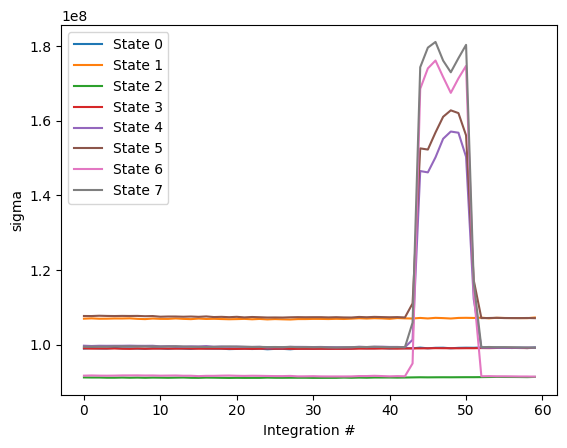

In [ ]:
#Get raw spectra and standard deviations
specs = sdfits.rawspectra(0,0)
print(specs.shape)
stdevs = np.std(specs,axis=1)
print(stdevs.shape)

#Organize into scan and switching state.
#There are 2 scans for the target and reference pointings, 2 calibration diode states, and 2 polarizations.
stdevs = np.reshape(stdevs, (2,-1,4))

nrows = stdevs.shape[1]

#Inspect the data
for scan in range(2):
    for sw_state in range(4):
        plt.plot(stdevs[scan,:-1,sw_state],label=f'State {(4*scan)+sw_state}')
        
plt.xlabel('Integration #')
plt.ylabel('sigma')
plt.legend()

We can see that the 4 states corresponding to the OFF scan have a significant jump corresponding to the GPS L3 RFI. It does not appear to start until the 40th integration, so we will use that as our cutoff to calculate the statistics of the good data, and the thresholds to flag by.

In [ ]:
flag_mask = np.zeros(stdevs.shape)
cutoff = 40

mean = np.mean(stdevs[:,:cutoff,:],axis=1)
spread = 3 * np.std(stdevs[:,:cutoff,:],axis=1)

In [ ]:
(stdevs[:,:cutoff,:]).shape

(2, 40, 4)

Now we create our flagging mask of zeros and ones, where a one corresponds to a flag to be applied.

In [ ]:
flag_mask = np.zeros(stdevs.shape)

mean = np.expand_dims(mean,axis=1)
spread = np.expand_dims(spread,axis=1)

flag_mask[stdevs > mean+spread] = 1
flag_mask = flag_mask.flatten()

flag_rows = np.where(flag_mask==1)[0].tolist()
print(flag_rows)

[176, 178, 185, 186, 187, 190, 191, 194, 195, 198, 199, 201, 202, 203, 206, 207, 208, 209, 210, 211, 214, 215, 216, 217, 218, 219, 222, 223, 226, 227, 230, 231, 234, 235, 236, 237, 238, 239, 240, 242, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 484, 486]


In [179]:
BC25_scans = Spectras.scan_list(BC_name="BC25")
Spectras.index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),)

In [165]:
BC13_scans = Spectras.scan_list(BC_name="BC13")
BC13_scans[1]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [166]:
BC25_spectra = Spectras.avg_spectra(6)

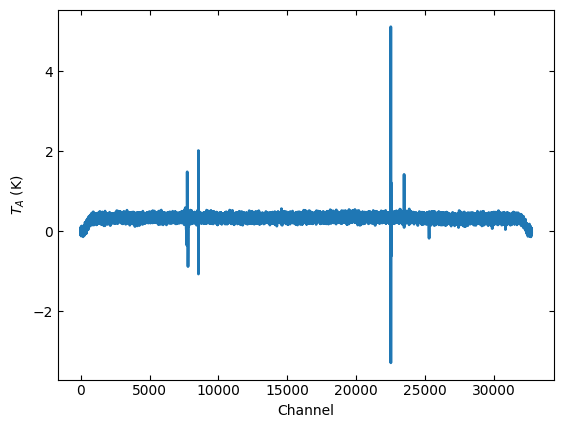

In [167]:
BC25_spectra.plot(xaxis_unit="chan")

IndexError: index 18 is out of bounds for axis 0 with size 17

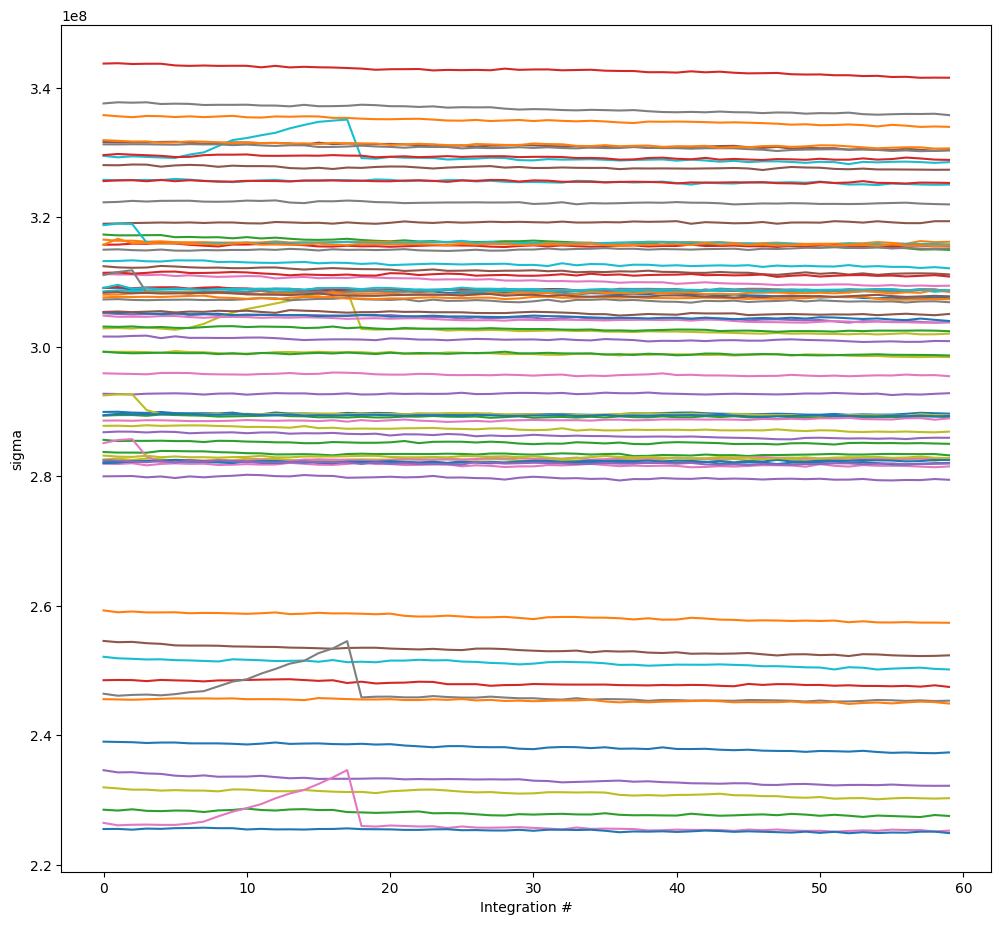

In [181]:
BC25_cutoff = Spectras.cutoff(BC25_scans)

IndexError: index 18 is out of bounds for axis 0 with size 17

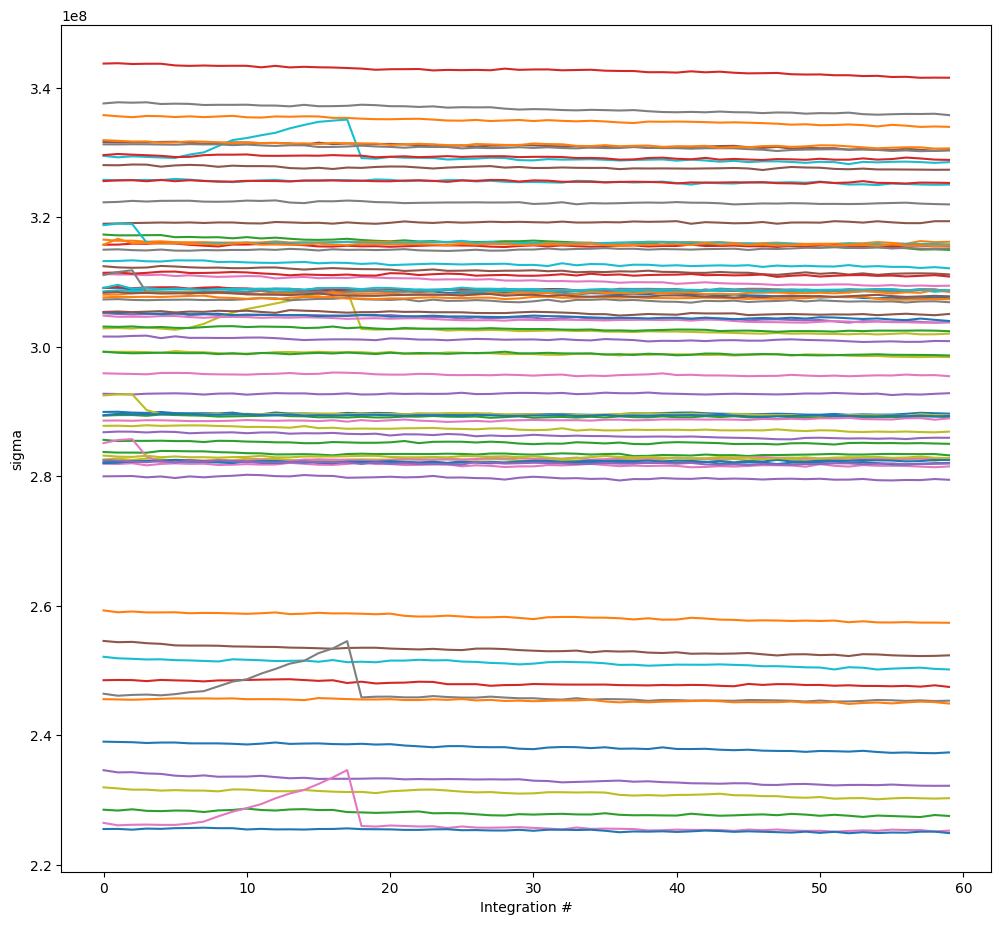

In [182]:
fig = plt.subplots(figsize = (12, 11))
#Inspect the data
for i in range(0,34,2):#scan_list[1][::2]:
    spec_new = specs[i]
    stdevs = np.std(spec_new,axis=1)
    #Organize into scan and switching state.
    #There are 2 scans for the target and reference pointings, 2 calibration diode states, and 2 polarizations.
    stdevs = np.reshape(stdevs, (2,-1,4))
    nrows = stdevs.shape[1]
    #Inspect the data
    for scan in range(2):
        for sw_state in range(4):
            plt.plot(stdevs[scan,:-1,sw_state],label=f'scan {(4*scan)+sw_state}')
    plt.xlabel('Integration #')
    plt.ylabel('sigma')
    #plt.legend()
plt.show()

In [169]:
flag_mask = np.zeros(stdevs.shape)
cutoff = -40
mean = np.mean(stdevs[:,:cutoff,:],axis=1)
spread = 3 * np.std(stdevs[:,:cutoff,:],axis=1)

In [171]:
mean, spread

(masked_array(
   data=[[[282205116.30457586, 307610182.8260806, 299011669.7920302,
           325621414.3322997]],
 
         [[279989187.6075616, 305432610.11395824, 295847174.15647036,
           322445038.21735543]]],
   mask=[[[False, False, False, False]],
 
         [[False, False, False, False]]],
   fill_value=1e+20),
 masked_array(
   data=[[[298178.9201061358, 444151.4940263741, 272766.48509809736,
           219794.3004672944]],
 
         [[399206.1371879581, 319027.80991908, 297856.9790825957,
           336221.52169023955]]],
   mask=[[[False, False, False, False]],
 
         [[False, False, False, False]]],
   fill_value=1e+20))

In [170]:
flag_mask = np.zeros(stdevs.shape)

mean = np.expand_dims(mean,axis=1)
spread = np.expand_dims(spread,axis=1)

flag_mask[stdevs > mean+spread] = 1
flag_mask = flag_mask.flatten()

flag_rows = np.where(flag_mask==1)[0].tolist()
print(flag_rows)

[240, 242, 484, 486]


In [203]:
for i in range(0,17):
    spec_new = specs[i]
    stdevs = np.std(spec_new,axis=1)
    #Organize into scan and switching state.
    #There are 2 scans for the target and reference pointings, 2 calibration diode states, and 2 polarizations.
    stdevs = np.reshape(stdevs, (2,-1,4))
    flag_mask = np.zeros(stdevs.shape)
    cutoff = -40
    mean = np.mean(stdevs[:,:cutoff,:],axis=1)
    spread = 3 * np.std(stdevs[:,:cutoff,:],axis=1)
    flag_mask = np.zeros(stdevs.shape)
    mean = np.expand_dims(mean,axis=1)
    spread = np.expand_dims(spread,axis=1)

    flag_mask[stdevs > mean+spread] = 1
    flag_mask = flag_mask.flatten()

    flag_rows = np.where(flag_mask==1)[0].tolist()
    print(flag_rows)

[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[240, 242, 368, 391, 484, 486]
[240, 242, 484, 486]
[240, 242, 484, 486]
[92, 240, 242, 331, 407, 451, 463, 479, 483, 484, 486]
[240, 242, 409, 412, 446, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 486]
[240, 242, 457, 477, 484, 486]
[240, 242, 484, 486]
[143, 158, 162, 166, 174, 186, 190, 194, 195, 198, 199, 202, 203, 206, 207, 210, 211, 214, 215, 218, 219, 226, 227, 230, 238, 239, 240, 242, 249, 251, 484, 486]


In [298]:
sdfits.clear_flags()
sdfits.flags.show()

 ID TAG OBJECT BANDWID DATE-OBS ... SUBOBSMODE FITSINDEX CHAN UTC # SELECTED
--- --- ------ ------- -------- ... ---------- --------- ---- --- ----------


In [308]:
Spectras = HI_reduction("02")

Flags were created from existing flag files. Use GBTFITSLoad.flags.show() to see them.
BCs to choose form: ['BC22' 'BC17' 'BC27']


In [ ]:
BC22_scans = Spectras.scan_list("BC22")
BC22_spectra = Spectras.avg_spectra(BC22_scans[0])

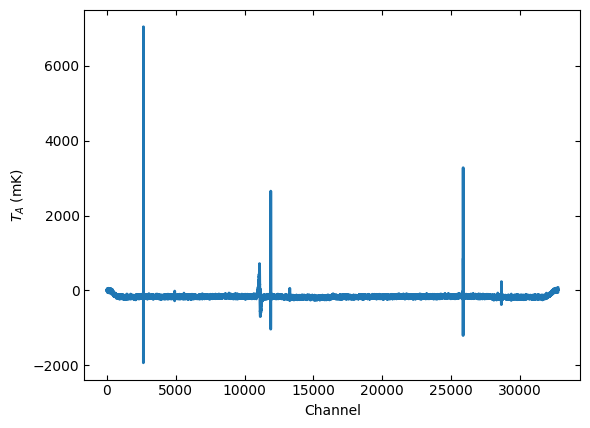

In [337]:
BC22_spectra.plot(xaxis_unit = "chan", yaxis_unit = "mK",y_min = -1000, y_max = 200)


In [314]:
mean_flux = np.array([np.mean(BC22_spectra.flux).value]*len(BC22_spectra.flux))



In [315]:
len(mean_flux), BC22_spectra.flux.value

(32768,
 array([ 0.02086482, -0.00618391,  0.02786607, ...,  0.03955746,
        -0.00190926,  0.0676032 ], shape=(32768,)))

In [319]:
mean_flux

array([-0.16572197, -0.16572197, -0.16572197, ..., -0.16572197,
       -0.16572197, -0.16572197], shape=(32768,))

In [323]:
flag_mask = np.zeros(BC22_spectra.shape)
flag_mask[BC22_spectra.flux.value > 3*np.abs(mean_flux)] = 1
flag_mask = flag_mask.flatten()

flag_rows = np.where(flag_mask==1)[0].tolist()
print(flag_rows)




[2648, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11081, 11082, 11083, 11084, 11085, 11086, 11087, 11088, 11089, 11090, 11091, 11092, 11902, 25883, 25891]


In [326]:
sdfits.flag(scan = 6, channel=[flag_rows])

In [327]:
sdfits.flags.show()

 ID    TAG    SCAN               CHAN               # SELECTED
--- --------- ---- -------------------------------- ----------
  0 540fdc932    6 [[2648,11074,11...,25883,25891]]        244


2647.6278220113645


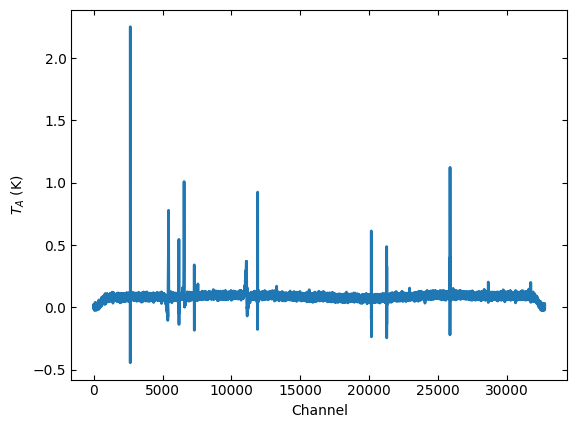

In [330]:
ps = sdfits.getps(6,plnum=0,apply_flags=False).timeaverage()
print(ps.meta['EXPOSURE'])

ps.plot(xaxis_unit="chan")

In [288]:
plt.imshow(ps[0]._calibrated, aspect="auto")

NotImplementedError: Use a slice for slicing.

In [277]:
specs = np.reshape(specs, (17, 488, -1)) 

In [82]:
specs[2].shape

(488, 32768)

In [79]:
stdevs = np.std(specs,axis=2)

In [80]:
stdevs.shape

(17, 488)

In [128]:
BC25_scans[1][::2]

array([ 0,  2,  4,  6,  8, 10])

(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)
(488, 32768)
(488,)
(2, 61, 4)


IndexError: index 18 is out of bounds for axis 0 with size 17

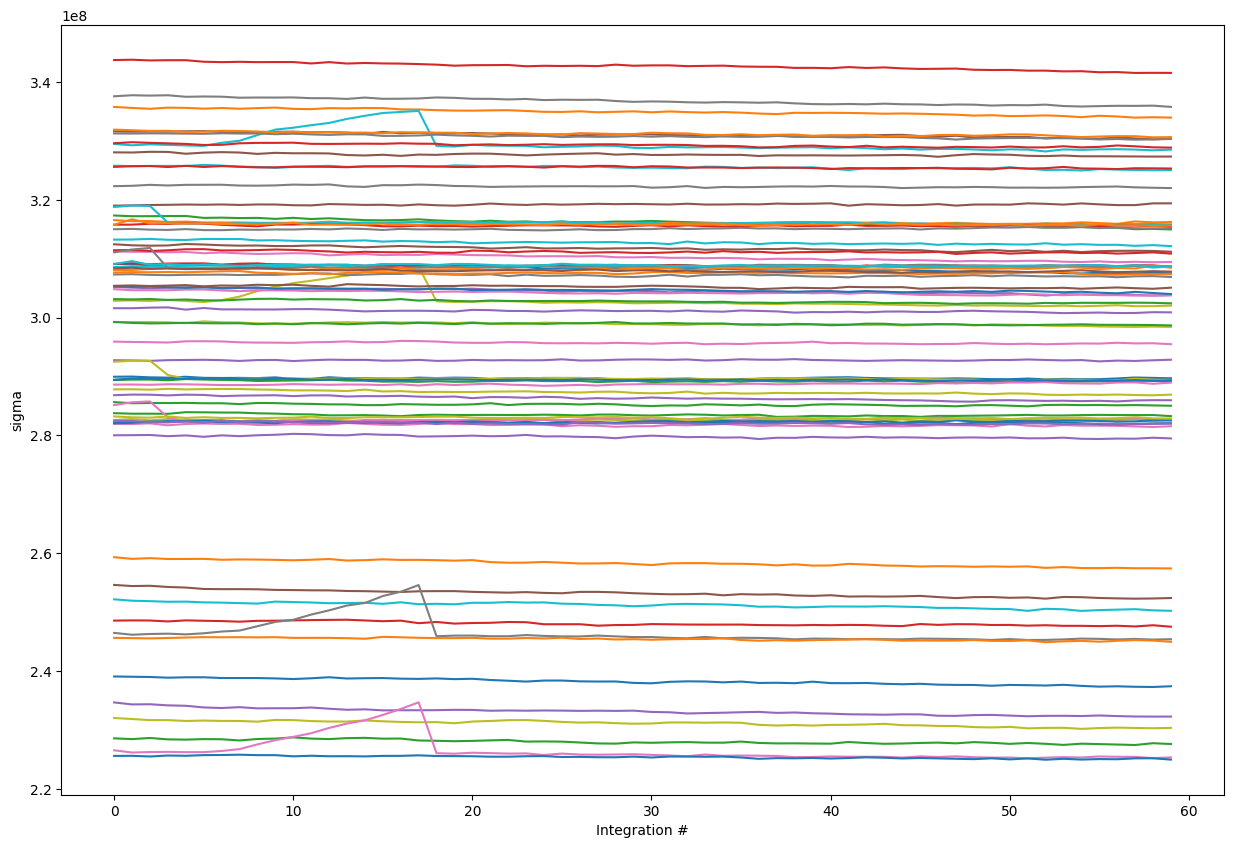

In [187]:
fig = plt.subplots(figsize = (15, 10))
#Inspect the data
for i in range(0,34,2):
    spec_new = specs[i]
    print(spec_new.shape)
    stdevs = np.std(spec_new,axis=1)
    print(stdevs.shape)

    #Organize into scan and switching state.
    #There are 2 scans for the target and reference pointings, 2 calibration diode states, and 2 polarizations.
    stdevs = np.reshape(stdevs, (2,-1,4))
    print(stdevs.shape)
    nrows = stdevs.shape[1]

    #Inspect the data
    for scan in range(2):
        for sw_state in range(4):
            plt.plot(stdevs[scan,:-1,sw_state],label=f'scan {(4*scan)+sw_state}')
        
    plt.xlabel('Integration #')
    plt.ylabel('sigma')
    #plt.legend()
plt.show()

In [64]:
stdevs = np.reshape(stdevs, (34,-1,4))

In [65]:
stdevs.shape

(34, 61, 4)

In [66]:
nrows = stdevs.shape[1]

In [1]:
path_to_raw_vegas = "/home/sdfits/AGBT24B_251_02/AGBT24B_251_02.raw.vegas/" 

# data loading
BC22_sdfits = GBTFITSLoad(path_to_raw_vegas, backend="VEGAS")
BC22_sdfits.flags.show()
BC22_sdfits.summary()
BC22_scans = Spectras.scan_list("BC22")
BC22_spectra = Spectras.avg_spectra(6)
BC22_sdfits= Spectras.spectra
type(BC22_spectra)
BC22_spectra.plot(xaxis_unit = "chan", yaxis_unit = "K",y_min = -1, y_max = 2)

mean_flux = np.array([np.mean(BC22_spectra.flux).value]*len(BC22_spectra.flux))



len(mean_flux), BC22_spectra.flux.value
std_flux = np.std(BC22_spectra.flux)
std_flux
median_flux = np.median(BC22_spectra.flux)
median_flux
BC22_spectra
median_flux+3*std_flux

#flag_mask = np.zeros(BC22_spectra.shape)
#flag_mask[BC22_spectra.flux > (median_flux+5*std_flux)] = 1

flag_mask = np.where(np.logical_or(BC22_spectra.flux > (median_flux+3*std_flux),
                                   BC22_spectra.flux < (median_flux-3*std_flux)),1,0)

flag_mask = flag_mask.flatten()

flag_rows = np.where(flag_mask==1)[0].tolist()
print(flag_rows)



plt.plot(range(0,len(BC22_spectra.flux)), BC22_spectra.flux, color = "b")
#plt.scatter(flag_rows, [2]*len(flag_rows)*u.K, color = "r")
plt.scatter(flag_rows, BC22_spectra.flux[flag_rows], color = "r")
BC22_sdfits.flag(scan = 6, channel=flag_rows)
BC22_sdfits.flags.show()
BC22_sdfits.clear_flags()
BC22_sdfits.flags.show()
ps = BC22_sdfits.getps(6,plnum=0)
ta = ps.timeaverage()
ta.plot(xaxis_unit="chan")
plt.imshow(ps[0]._calibrated, aspect="auto")

NameError: name 'GBTFITSLoad' is not defined